In [11]:
import pandas as pd
year = 2022
url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
table_list = pd.read_html(url)
df = table_list[0]
df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,01/04/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,01/05/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,01/06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11


In [12]:
df.columns

Index(['Date', '20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr',
       '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1'],axis=1).set_index('Date')

In [14]:
df

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,2.15,2.30,2.48,3.00,3.11,3.10,3.07,3.00,2.99,2.91,3.33,3.08
2022-07-22,2.15,2.29,2.49,2.97,3.01,2.98,2.93,2.87,2.85,2.77,3.23,3.00
2022-07-25,2.14,2.31,2.62,3.06,3.07,3.00,2.98,2.89,2.89,2.81,3.28,3.04


In [15]:
def clean_df(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date', inplace=True)
    df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1','2 Mo'],axis=1)
    return df

In [16]:
df = clean_df(df)
df

KeyError: 'Date'

In [17]:
import seaborn as sns

<AxesSubplot:ylabel='Date'>

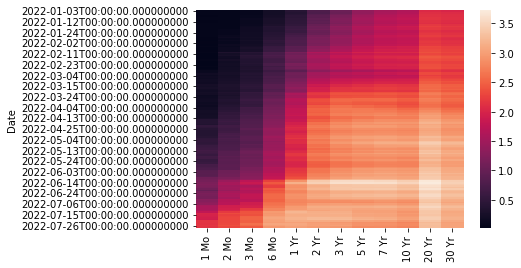

In [18]:
sns.heatmap(df)

In [19]:
for year in range(2010,2021):
    url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
    table_list = pd.read_html(url)
    df = pd.concat([df,clean_df(table_list[0])])

AttributeError: 'NoneType' object has no attribute 'drop'

In [20]:
df

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,2.15,2.30,2.48,3.00,3.11,3.10,3.07,3.00,2.99,2.91,3.33,3.08
2022-07-22,2.15,2.29,2.49,2.97,3.01,2.98,2.93,2.87,2.85,2.77,3.23,3.00
2022-07-25,2.14,2.31,2.62,3.06,3.07,3.00,2.98,2.89,2.89,2.81,3.28,3.04


In [21]:
df = df.sort_index()

In [22]:
df

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,2.15,2.30,2.48,3.00,3.11,3.10,3.07,3.00,2.99,2.91,3.33,3.08
2022-07-22,2.15,2.29,2.49,2.97,3.01,2.98,2.93,2.87,2.85,2.77,3.23,3.00
2022-07-25,2.14,2.31,2.62,3.06,3.07,3.00,2.98,2.89,2.89,2.81,3.28,3.04


In [23]:
df = df.drop('2 Mo',axis=1)

In [24]:
df.head()

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
2022-01-03,0.05,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11


In [29]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [30]:
x = df.columns
y = df.index
z = df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Yield Curves',
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": 0.4}})
fig.show()